In [1]:
library('tidyverse')

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
msleep |> head()

name,genus,vore,order,conservation,sleep_total,sleep_rem,sleep_cycle,awake,brainwt,bodywt
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Cheetah,Acinonyx,carni,Carnivora,lc,12.1,NA,NA,11.9,NA,50.000
Owl monkey,Aotus,omni,Primates,NA,17.0,1.8,NA,7.0,0.01550,0.480
Mountain beaver,Aplodontia,herbi,Rodentia,nt,14.4,2.4,NA,9.6,NA,1.350
Greater short-tailed shrew,Blarina,omni,Soricomorpha,lc,14.9,2.3,0.1333333,9.1,0.00029,0.019
Cow,Bos,herbi,Artiodactyla,domesticated,4.0,0.7,0.6666667,20.0,0.42300,600.000
Three-toed sloth,Bradypus,herbi,Pilosa,NA,14.4,2.2,0.7666667,9.6,NA,3.850


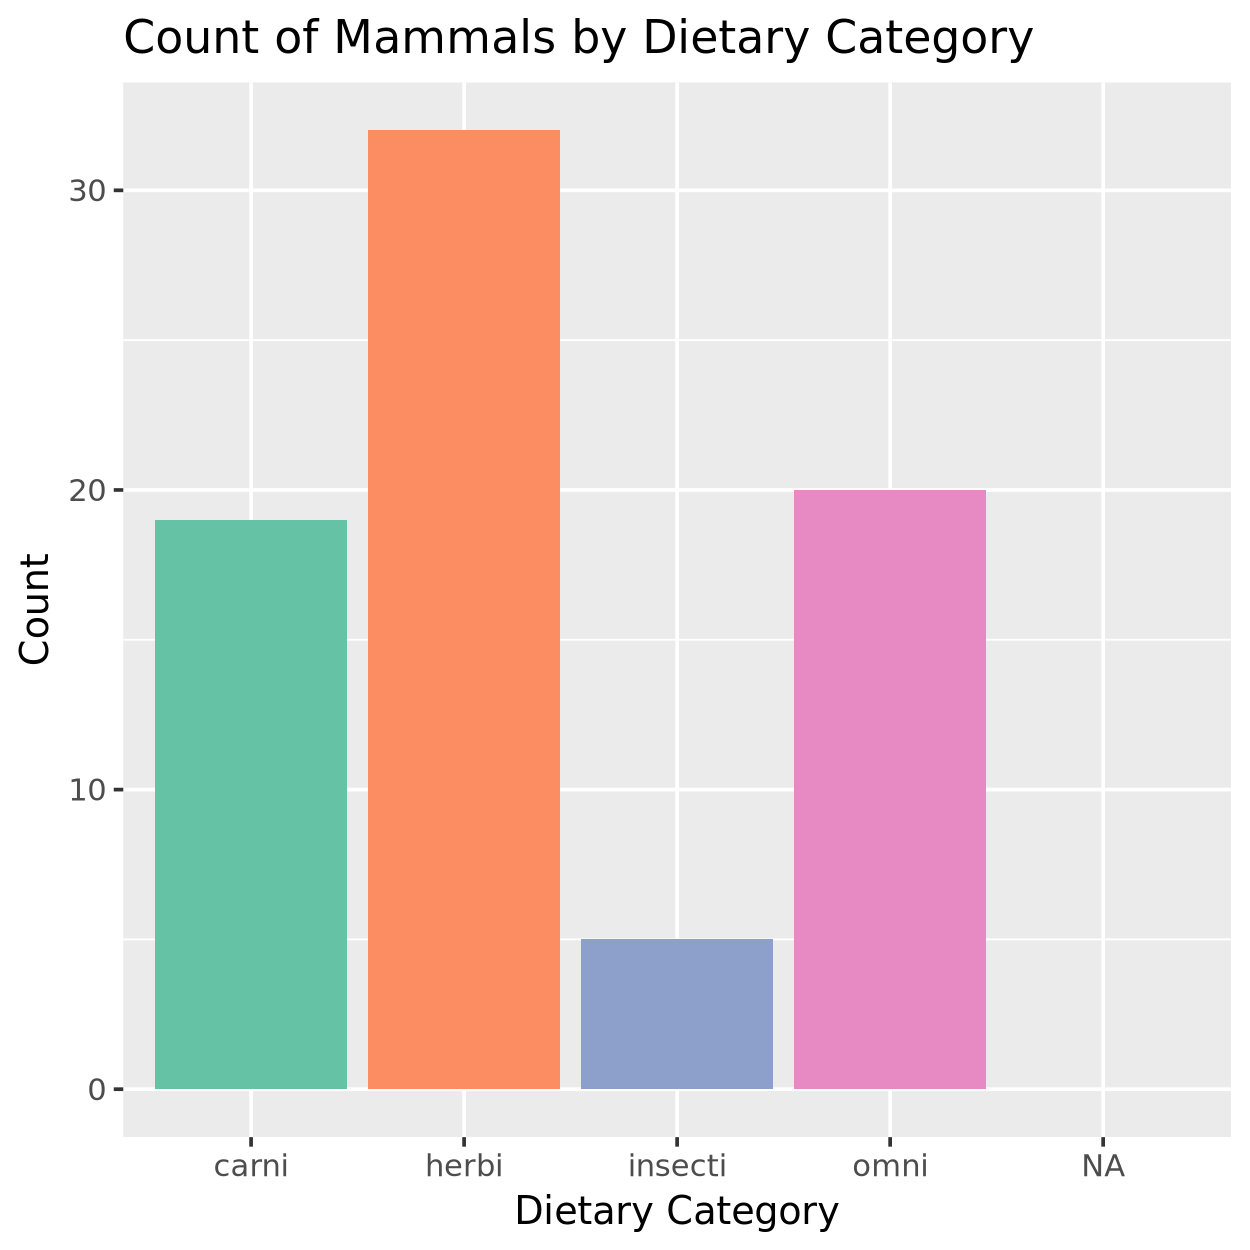

In [3]:
# Visualization 1
options(repr.plot.width = 5, repr.plot.height = 5)

ggplot(msleep, aes(x = vore, fill = vore)) +
    geom_bar() +
    labs(title = "Count of Mammals by Dietary Category",
        x = "Dietary Category",
        y = "Count") +
    scale_fill_brewer(palette = "Set2") +
    theme(legend.position = "none")

This bar chart shows the distribution of dietary categories among mammals. Herbivores are the most common, followed by omnivores then carnivores. Insectivores are the least common dietary category. For certain species, there is no diets assoicated due to missing values. This could potentially skew the data.

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


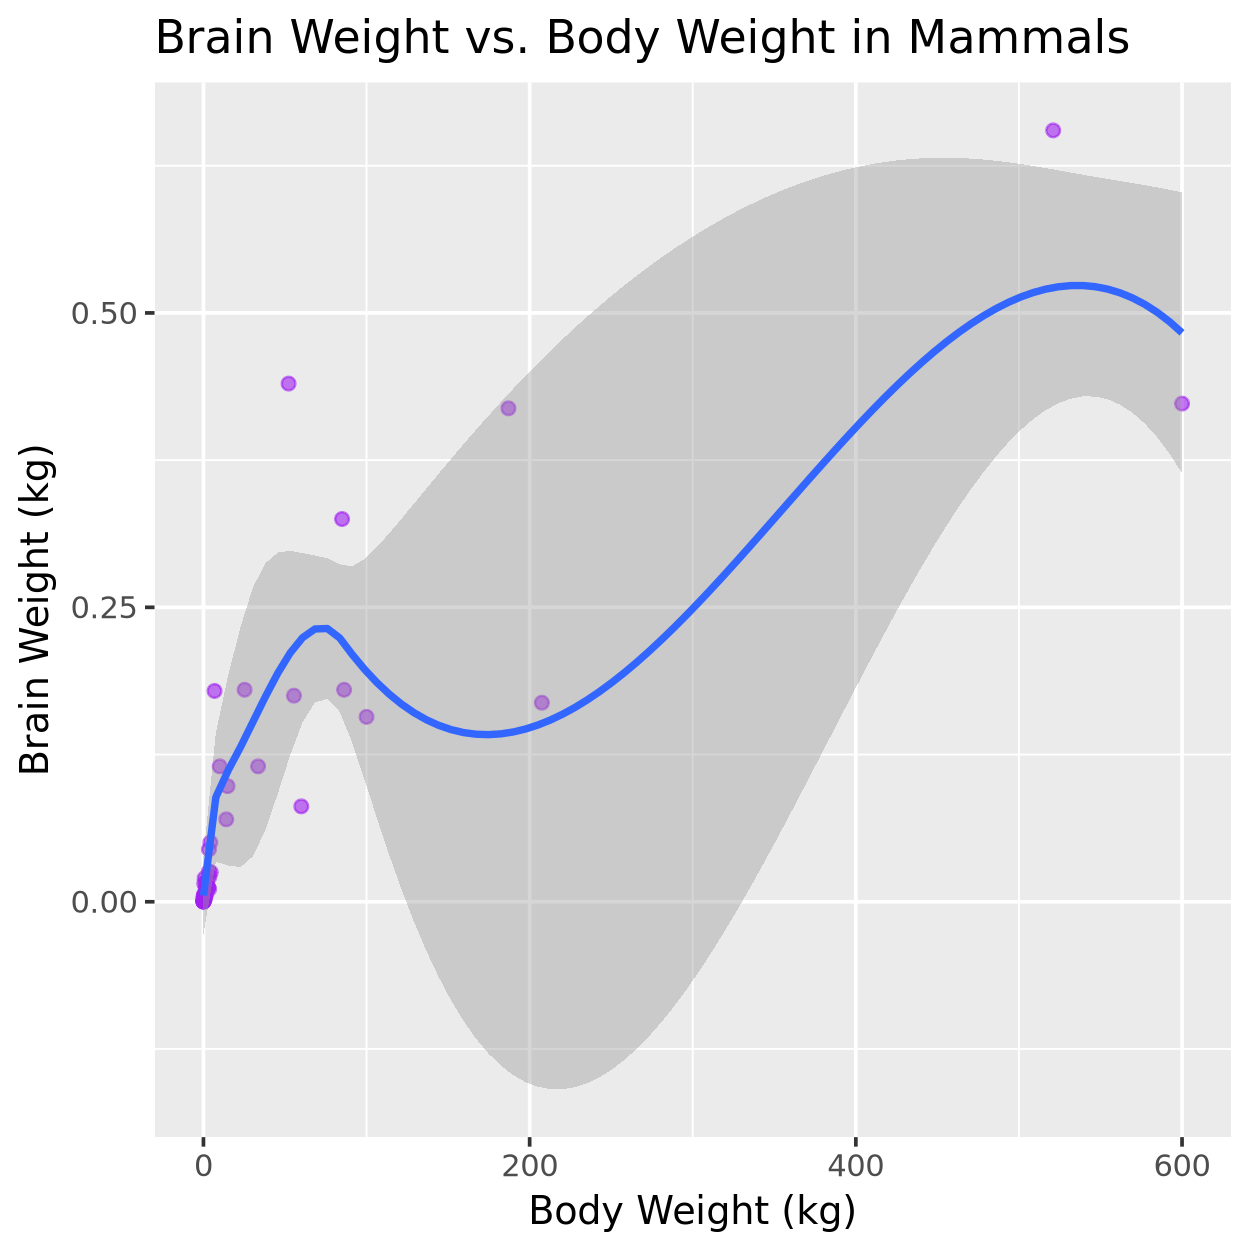

In [4]:
# Visualization 2
msleep2 = msleep |> filter(bodywt < 2000, brainwt < 1)

ggplot(msleep2, aes(x = bodywt, y = brainwt)) +
    geom_point(alpha = 0.6, color = "purple") +
    geom_smooth() +
    labs(title = "Brain Weight vs. Body Weight in Mammals",
         x = "Body Weight (kg)",
         y = "Brain Weight (kg)")

In this visualization, I am looking at the relationship between brain weight and body weight in mammals. I am focusing on animals with body weights under 2000 kg and brain weights under 1 kg to reduce the impact of extreme outliers. The scatter plot shows a positive correlation between body weight and brain weight. This means that larger animals generally having larger brains. The smoothed trend line further highlights this relationship. However, there are still extreme outliers in both directions which may be due to genetic mutation or natural selection.

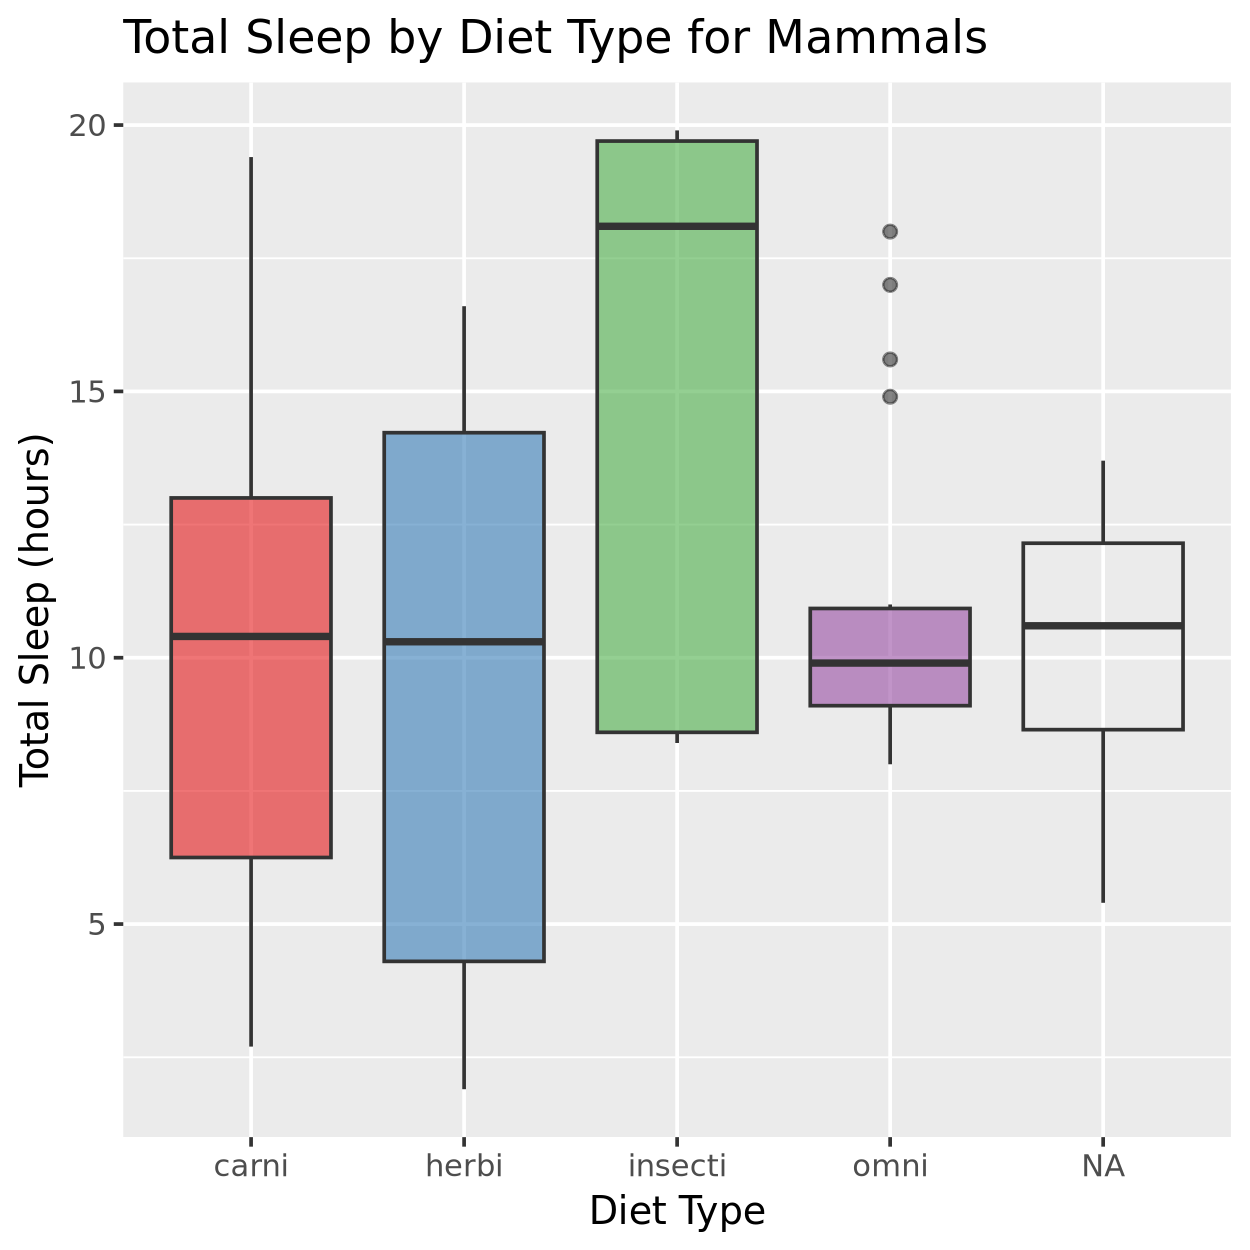

In [5]:
#Visualization 3
ggplot(msleep, aes(x = vore, y = sleep_total, fill = vore)) +
    geom_boxplot(alpha = 0.6) +
    labs(title = "Total Sleep by Diet Type for Mammals",
         x = "Diet Type",
         y = "Total Sleep (hours)") +
    scale_fill_brewer(palette = "Set1") +
    theme(legend.position = "none")

This visualization compares the distribution of total sleep hours across different diet types for the mammals. The boxplot highlights the median, interquartile range, and potential outliers for each diet type. On average, insectivores tend to have the highest total sleep hours. Both insectivores and herbivores have a large variability in their sleep patterns while omnivores tend to have a very similar amount of total sleep. A clear outlier in this data shows that there is a mammal (that is an herbivore) gets as less as 2 hours of sleep.